In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#các thư viện cần thiết
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   2   2 ...   0   0   0]
 ...
 [  0   0   0 ... 166  21 110]
 [  0   0   0 ...  15  57  68]
 [  0   0   0 ...  25  53  75]]


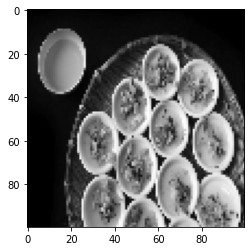

In [ ]:
datadrive = "/content/drive/MyDrive/10loaimonanVN"
phanloai=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
img_size=100
for doituong in phanloai:
  path=os.path.join(datadrive,doituong)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
#tạo dữ liệu để train
training_data=[]
def create_traning_data():

  for doituong in phanloai:
    path = os.path.join(datadrive,doituong)
    class_num = phanloai.index(doituong)

    for img in tqdm(os.listdir(path)): #tqdm hàm thể hiện thanh tiến trình
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 564/564 [00:16<00:00, 33.45it/s]

6803


In [ ]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (6803, 100, 100, 1)
y (6803,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/faceid-3-people/save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/faceid-3-people/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("/content/drive/MyDrive/faceid-3-people/save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/faceid-3-people/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (6803, 100, 100, 1)
y (6803,)


In [ ]:
#tạo MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
y= to_categorical(y,10) #phân nhóm theo tính chất


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam() #Adam 1 trong những hàm tối ưu hóa cách học trong thư viện 
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=100,batch_size=64,validation_split=0.3,verbose=1)

Epoch 1/100
75/75 [==============================] - 22s 145ms/step - loss: 2.0456 - accuracy: 0.2163 - val_loss: 5.5604 - val_accuracy: 0.0000e+00
Epoch 2/100
75/75 [==============================] - 10s 129ms/step - loss: 1.8061 - accuracy: 0.2730 - val_loss: 8.9529 - val_accuracy: 0.0088
Epoch 3/100
75/75 [==============================] - 10s 129ms/step - loss: 1.6428 - accuracy: 0.3513 - val_loss: 9.8703 - val_accuracy: 0.0054
Epoch 4/100
75/75 [==============================] - 10s 129ms/step - loss: 1.4465 - accuracy: 0.4395 - val_loss: 11.2101 - val_accuracy: 0.0240
Epoch 5/100
75/75 [==============================] - 10s 130ms/step - loss: 1.2531 - accuracy: 0.5267 - val_loss: 14.1268 - val_accuracy: 0.0171
Epoch 6/100
75/75 [==============================] - 10s 129ms/step - loss: 1.0671 - accuracy: 0.6033 - val_loss: 13.1061 - val_accuracy: 0.0265
Epoch 7/100
75/75 [==============================] - 11s 152ms/step - loss: 0.8230 - accuracy: 0.6953 - val_loss: 22.5911 - val_a

In [ ]:
model.save('10loaimonanVN-19146118.h5')

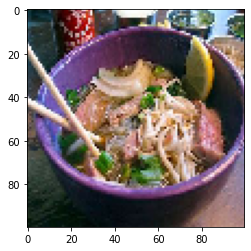

Prediction value bun rieu


In [ ]:
img_test='/content/pho bo.jpg'
phanloai=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',phanloai[int(np.argmax(prediction))])

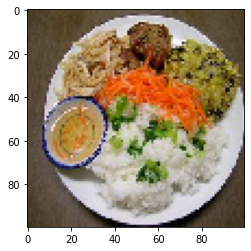

Prediction value com tam


In [ ]:
img_test='/content/comtam.jpg'
phanloai=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',phanloai[int(np.argmax(prediction))])